In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from pandas.plotting import register_matplotlib_converters
from sklearn import metrics
register_matplotlib_converters()
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
games = pd.read_csv('Video_Games_Sales.csv')

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
games.shape

(16719, 16)

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [10]:
games.describe(include='all')

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
count,16717,16719,16450.000000,16717,16665,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,10015,7590.000000,10096,9950
unique,11562,31,NaN,12,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,NaN,1696,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tbd,NaN,Ubisoft,E
freq,12,2161,NaN,3370,1356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2425,NaN,204,3991
mean,NaN,NaN,2006.487356,NaN,NaN,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,NaN,162.229908,NaN,NaN
std,NaN,NaN,5.878995,NaN,NaN,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,NaN,561.282326,NaN,NaN
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,NaN,4.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,NaN,10.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,NaN,24.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,NaN,81.000000,NaN,NaN


In [11]:
gamesSales = games.loc[ :, 'Name' : 'Global_Sales'].dropna()

In [12]:
gamesSales['Year_of_Release'] = gamesSales['Year_of_Release'].astype('int')

In [13]:
gamesSales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [14]:
gamesSales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16416 entries, 0 to 16718
Data columns (total 10 columns):
Name               16416 non-null object
Platform           16416 non-null object
Year_of_Release    16416 non-null int32
Genre              16416 non-null object
Publisher          16416 non-null object
NA_Sales           16416 non-null float64
EU_Sales           16416 non-null float64
JP_Sales           16416 non-null float64
Other_Sales        16416 non-null float64
Global_Sales       16416 non-null float64
dtypes: float64(5), int32(1), object(4)
memory usage: 1.3+ MB


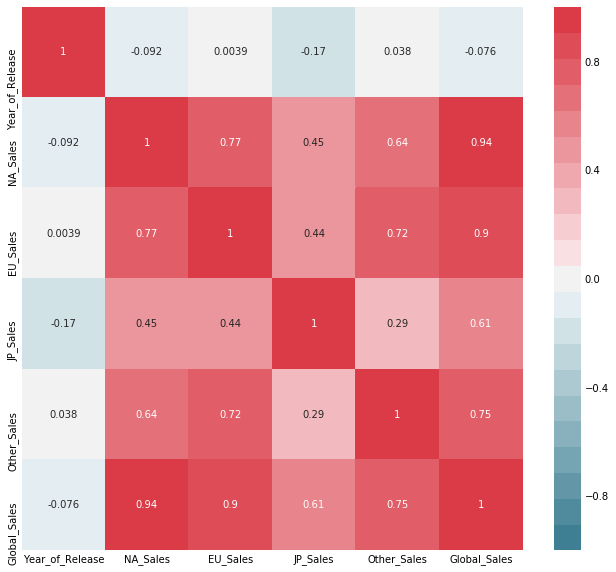

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(gamesSales.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(220, 10, n=21),
            annot=True,
            ax=ax,
           );

In [17]:
#g = sns.pairplot(gamesSales, hue='Global_Sales');

In [16]:
target_col = 'Global_Sales'
feature_cols = ['Year_of_Release',
                'NA_Sales', 'EU_Sales', 'JP_Sales']

X = gamesSales.loc[:,feature_cols]

y = gamesSales.loc[:,target_col]

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

# Splitting both target and features data into a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 16)

# Creating a linear regression model instance and fitting the training data to it
lr_gamesSales = LinearRegression()
lr_gamesSales.fit(X_train, y_train)
lr_gamesSales.score(X_test, y_test)

# Evaluating the model 
print('Test Data R-Squared:', lr_gamesSales.score(X_test, y_test))       # Comparing test data to null model/finding R-Squared 
print('Training Data R-Squared:', lr_gamesSales.score(X_train, y_train)) # Comparing test data to null model/finding R-Squared 

y_pred = lr_gamesSales.predict(X_test)
print('Test Data RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Finding RMSE
print ('Test Data MAE:', metrics.mean_absolute_error(y_test, y_pred))         # Finding MAE

Test Data R-Squared: 0.998268132008275
Training Data R-Squared: 0.990616259485546
Test Data RMSE: 0.07784824748937491
Test Data MAE: 0.02542352759004321
